In [1]:
import math
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import seaborn as sns  
import matplotlib.pyplot as plt
from scipy import stats
from datetime import datetime

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.preprocessing import PolynomialFeatures
import sklearn.preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.feature_selection import SelectKBest, f_regression, RFE

import Acquire as a
import Prepare as p

## Acquiring Our Dataframe

In [2]:
df = a.get_texas_data() ## using acquire function to pull down our csv into pandas

df.head() ## previewing dataframe

,AGY,NAME,LASTNAME,FIRSTNAME,MI,JOBCLASS,JC TITLE,RACE,SEX,EMPTYPE,...,RATE,HRSWKD,MONTHLY,ANNUAL,STATENUM,duplicated,multiple_full_time_jobs,combined_multiple_jobs,summed_annual_salary,hide_from_search
0,101,SENATE ...,GILLIAM,STACEY,L,7101,LEG. OFFICIAL/ADMINISTRATOR ...,WHITE,FEMALE,URP - UNCLASSIFIED REGULAR PART-TIME,...,0.0,20.0,8100.0,97200.0,339371,True,NaN,NaN,181200.0,NaN
1,104,LEGISLATIVE BUDGET BOARD ...,GILLIAM,STACEY,L,C160,COMMITTEE DIRECTOR ...,WHITE,FEMALE,URP - UNCLASSIFIED REGULAR PART-TIME,...,0.0,20.0,7000.0,84000.0,339371,True,NaN,NaN,NaN,True
2,101,SENATE ...,NELSON,DAVID,,7101,LEG. OFFICIAL/ADMINISTRATOR ...,WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,...,0.0,20.0,9500.0,114000.0,193187,True,NaN,NaN,210000.0,NaN
3,104,LEGISLATIVE BUDGET BOARD ...,NELSON,DAVID,,P080,SENIOR BUDGET ADVISOR ...,WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,...,0.0,20.0,8000.0,96000.0,193187,True,NaN,NaN,NaN,True
4,101,SENATE ...,ROCHA,MARIE,S,7103,LEG. SERVICE/MAINTENANCE ...,HISPANIC,FEMALE,URF - UNCLASSIFIED REGULAR FULL-TIME,...,0.0,41.0,3365.4,40384.8,152257,True,NaN,True,NaN,NaN


## Preparing Our Dataframe

In [3]:
## using our prepare function to clean strings, and drop nulls and duplicate

df = p.prepare_tex(df)

df.head() ## previewing dataframe

,agency_id,agency,lastname,firstname,title,race,sex,emptype,hire_date,hours_worked,monthly_salary,annual_salary
0,101,SENATE,GILLIAM,STACEY,LEG. OFFICIAL/ADMINISTRATOR,WHITE,FEMALE,URP - UNCLASSIFIED REGULAR PART-TIME,2013-07-01,20.0,8100.0,97200.0
1,104,LEGISLATIVE BUDGET BOARD,GILLIAM,STACEY,COMMITTEE DIRECTOR,WHITE,FEMALE,URP - UNCLASSIFIED REGULAR PART-TIME,2017-11-01,20.0,7000.0,84000.0
2,101,SENATE,NELSON,DAVID,LEG. OFFICIAL/ADMINISTRATOR,WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,1998-12-01,20.0,9500.0,114000.0
3,104,LEGISLATIVE BUDGET BOARD,NELSON,DAVID,SENIOR BUDGET ADVISOR,WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,2017-11-01,20.0,8000.0,96000.0
4,101,SENATE,ROCHA,MARIE,LEG. SERVICE/MAINTENANCE,HISPANIC,FEMALE,URF - UNCLASSIFIED REGULAR FULL-TIME,2003-05-01,41.0,3365.4,40384.8


In [4]:
df = p.create_features(df)

In [5]:
df.head()

,agency_id,agency,lastname,firstname,title,race,sex,emptype,hire_date,hours_worked,...,is_hispanic,is_black,is_BIPOC,race_encoded,tenure_months,tenure_years,is_elected,is_director,is_unclassified,is_parttime
0,101,SENATE,GILLIAM,STACEY,LEG. OFFICIAL/ADMINISTRATOR,WHITE,FEMALE,URP - UNCLASSIFIED REGULAR PART-TIME,2013-07-01,20.0,...,0,0,0,5,96,8.0,0,0,1,1
1,104,LEGISLATIVE BUDGET BOARD,GILLIAM,STACEY,COMMITTEE DIRECTOR,WHITE,FEMALE,URP - UNCLASSIFIED REGULAR PART-TIME,2017-11-01,20.0,...,0,0,0,5,44,3.7,0,1,1,1
2,101,SENATE,NELSON,DAVID,LEG. OFFICIAL/ADMINISTRATOR,WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,1998-12-01,20.0,...,0,0,0,5,271,22.6,0,0,1,1
3,104,LEGISLATIVE BUDGET BOARD,NELSON,DAVID,SENIOR BUDGET ADVISOR,WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,2017-11-01,20.0,...,0,0,0,5,44,3.7,0,0,1,1
4,101,SENATE,ROCHA,MARIE,LEG. SERVICE/MAINTENANCE,HISPANIC,FEMALE,URF - UNCLASSIFIED REGULAR FULL-TIME,2003-05-01,41.0,...,1,0,1,3,218,18.2,0,0,1,0


In [6]:
df.is_white.value_counts()

0    80083
1    64647
Name: is_white, dtype: int64

In [7]:
df.is_female.value_counts()

1    82865
0    61865
Name: is_female, dtype: int64

In [8]:
df.is_BIPOC.value_counts()

1    80083
0    64647
Name: is_BIPOC, dtype: int64

In [9]:
df.is_elected.value_counts()

0    144456
1       274
Name: is_elected, dtype: int64

### Creating Bins For Years of Tenure

Looking At Our Maximum Age and Minimum Age to Make Some Age Bins

Max: 49.8, Min: 0.0

----------------------------

Visualizing Years of Tenure Column To Help with Binning



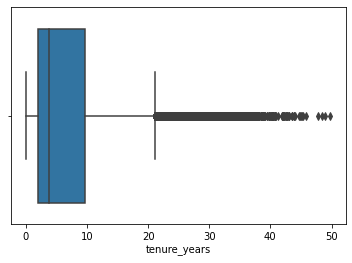


----------------------------

Looking At Our Years of Tenure Bins Value Counts
1    83012
2    27330
3    25513
4     8875
Name: tenure_years_bins, dtype: int64

----------------------------



In [10]:
df = p.make_bins_and_feats(df)

In [11]:
df.head()

,agency_id,agency,lastname,firstname,title,race,sex,emptype,hire_date,hours_worked,...,tenure_years,is_elected,is_director,is_unclassified,is_parttime,tenure_years_bins,0-5_years,5-10_years,10-20_years,>20_years
0,101,SENATE,GILLIAM,STACEY,LEG. OFFICIAL/ADMINISTRATOR,WHITE,FEMALE,URP - UNCLASSIFIED REGULAR PART-TIME,2013-07-01,20.0,...,8.0,0,0,1,1,2,0,1,0,0
1,104,LEGISLATIVE BUDGET BOARD,GILLIAM,STACEY,COMMITTEE DIRECTOR,WHITE,FEMALE,URP - UNCLASSIFIED REGULAR PART-TIME,2017-11-01,20.0,...,3.7,0,1,1,1,1,1,0,0,0
2,101,SENATE,NELSON,DAVID,LEG. OFFICIAL/ADMINISTRATOR,WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,1998-12-01,20.0,...,22.6,0,0,1,1,4,0,0,0,1
3,104,LEGISLATIVE BUDGET BOARD,NELSON,DAVID,SENIOR BUDGET ADVISOR,WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,2017-11-01,20.0,...,3.7,0,0,1,1,1,1,0,0,0
4,101,SENATE,ROCHA,MARIE,LEG. SERVICE/MAINTENANCE,HISPANIC,FEMALE,URF - UNCLASSIFIED REGULAR FULL-TIME,2003-05-01,41.0,...,18.2,0,0,1,0,3,0,0,1,0


### Splitting Data

In [12]:
train, validate, test = p.split_data(df)

Making Sure Our Shapes Look Good
Train: (81048, 29), Validate: (34736, 29), Test: (28946, 29)


In [13]:
train.head()

,agency_id,agency,lastname,firstname,title,race,sex,emptype,hire_date,hours_worked,...,tenure_years,is_elected,is_director,is_unclassified,is_parttime,tenure_years_bins,0-5_years,5-10_years,10-20_years,>20_years
125096,696,TEXAS DEPARTMENT OF CRIMINAL JUSTICE,OKECHI,VICTOR,CORREC OFFICER IV,BLACK,MALE,CRF - CLASSIFIED REGULAR FULL-TIME,2017-02-06,40.0,...,4.4,0,0,0,0,1,1,0,0,0
42845,529,HEALTH AND HUMAN SERVICES COMMISSION,EKRAM,NIDAA,PROGRAM SPECIALIST V,ASIAN,FEMALE,CRF - CLASSIFIED REGULAR FULL-TIME,2020-09-08,40.0,...,0.8,0,0,0,0,1,1,0,0,0
117530,696,TEXAS DEPARTMENT OF CRIMINAL JUSTICE,ISIORHOVOJA,ANDREW,CORREC OFFICER IV,BLACK,MALE,CRF - CLASSIFIED REGULAR FULL-TIME,2020-03-30,40.0,...,1.2,0,0,0,0,1,1,0,0,0
26227,405,DEPARTMENT OF PUBLIC SAFETY,NETT,ROBERT,"SERGEANT, DPS",WHITE,MALE,CRF - CLASSIFIED REGULAR FULL-TIME,2009-09-27,40.0,...,11.8,0,0,0,0,3,0,0,1,0
113713,696,TEXAS DEPARTMENT OF CRIMINAL JUSTICE,GARZA,AMANDA,PAROLE OFFCR II,HISPANIC,FEMALE,CRF - CLASSIFIED REGULAR FULL-TIME,2016-08-15,40.0,...,4.9,0,0,0,0,1,1,0,0,0


In [14]:
validate.head()

,agency_id,agency,lastname,firstname,title,race,sex,emptype,hire_date,hours_worked,...,tenure_years,is_elected,is_director,is_unclassified,is_parttime,tenure_years_bins,0-5_years,5-10_years,10-20_years,>20_years
144519,592,SOIL AND WATER CONSERVATION BOARD,KENNEDY,SHANNON,NETWORK SPEC II,BLACK,FEMALE,CRF - CLASSIFIED REGULAR FULL-TIME,2017-10-23,40.0,...,3.7,0,0,0,0,1,1,0,0,0
84211,537,DEPARTMENT OF STATE HEALTH SERVICES,TANGALOS,REBECCA,MEDICAL TECHNOLOGIST IV,WHITE,FEMALE,CRF - CLASSIFIED REGULAR FULL-TIME,2015-04-06,40.0,...,6.2,0,0,0,0,2,0,1,0,0
126534,696,TEXAS DEPARTMENT OF CRIMINAL JUSTICE,PEGODA,CLIFFORD,MGR IV,WHITE,MALE,CRF - CLASSIFIED REGULAR FULL-TIME,2001-12-06,40.0,...,19.6,0,0,0,0,3,0,0,1,0
99947,601,TEXAS DEPARTMENT OF TRANSPORTATION,WEST III,JOHN,TRANS MAINT SPEC IV,WHITE,MALE,CRF - CLASSIFIED REGULAR FULL-TIME,2004-03-16,40.0,...,17.3,0,0,0,0,3,0,0,1,0
29847,405,DEPARTMENT OF PUBLIC SAFETY,WRIGHT,KEVIN,"SERGEANT, DPS",WHITE,MALE,CRF - CLASSIFIED REGULAR FULL-TIME,1999-09-27,40.0,...,21.8,0,0,0,0,4,0,0,0,1


In [15]:
test.head()

,agency_id,agency,lastname,firstname,title,race,sex,emptype,hire_date,hours_worked,...,tenure_years,is_elected,is_director,is_unclassified,is_parttime,tenure_years_bins,0-5_years,5-10_years,10-20_years,>20_years
85971,582,TEXAS COMMISSION ON ENVIRONMENTAL QUALITY,JOHNSON,LAURA,NATURAL RESOURCES SPEC III,WHITE,FEMALE,CRF - CLASSIFIED REGULAR FULL-TIME,2018-08-06,40.0,...,2.9,0,0,0,0,1,1,0,0,0
115287,696,TEXAS DEPARTMENT OF CRIMINAL JUSTICE,HALIM,HARRIET,CORREC OFFCR III,BLACK,FEMALE,CRF - CLASSIFIED REGULAR FULL-TIME,2021-05-17,40.0,...,0.1,0,0,0,0,1,1,0,0,0
82959,537,DEPARTMENT OF STATE HEALTH SERVICES,LARSEN,JANIE,PUBLIC HLTH & PRVNT SPEC III,HISPANIC,FEMALE,CRF - CLASSIFIED REGULAR FULL-TIME,2017-02-01,40.0,...,4.4,0,0,0,0,1,1,0,0,0
137863,772,SCHOOL FOR THE DEAF,MILANI,CHRISTOPHE,FOOD SRVC MGR IV,WHITE,MALE,CRF - CLASSIFIED REGULAR FULL-TIME,2019-10-15,40.0,...,1.8,0,0,0,0,1,1,0,0,0
120138,696,TEXAS DEPARTMENT OF CRIMINAL JUSTICE,LETIGIO,VINCENT,CORREC OFFICER IV,ASIAN,MALE,CRF - CLASSIFIED REGULAR FULL-TIME,2017-11-06,40.0,...,3.7,0,0,0,0,1,1,0,0,0


## Exploring Our Dataframe

### Looking at Correlations

#### Heatmaps

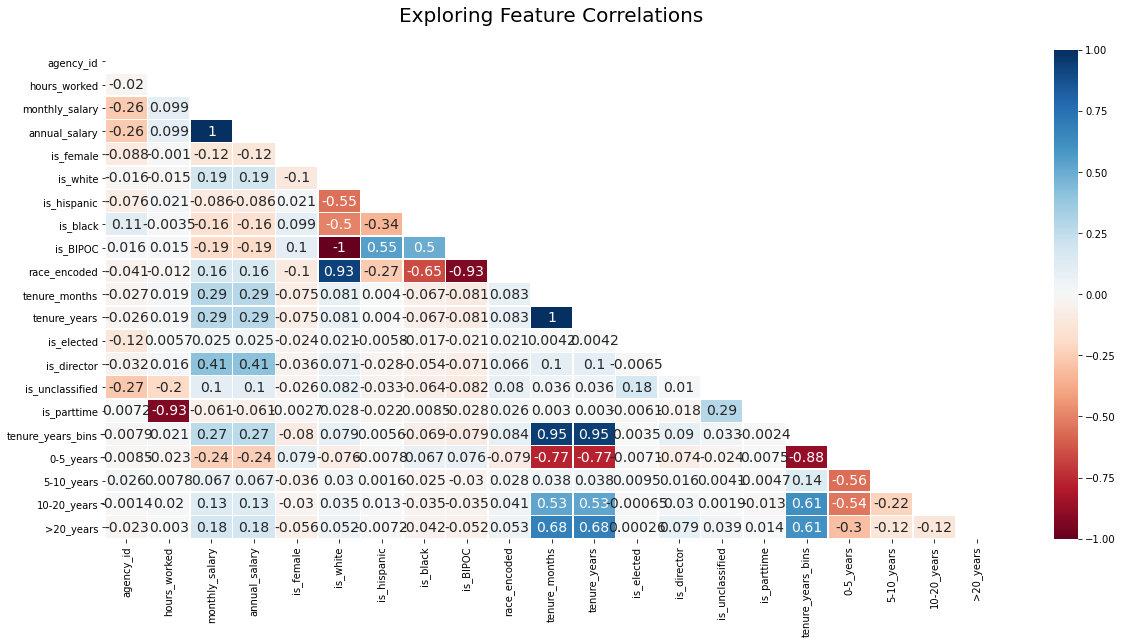

In [16]:
## defining correlation variable for heatmap
corr = train.corr()

## creating a heatmap of the correlation between all columns in our dataframe

plt.figure(figsize=(20,9))
mask = np.zeros_like(corr)  ## <-- creating a mask
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, center=0, annot=True, linewidths=.5, cmap='RdBu',
            annot_kws={"size": 14}, mask=mask)
plt.title('Exploring Feature Correlations\n', {'fontsize': 20})
plt.show()

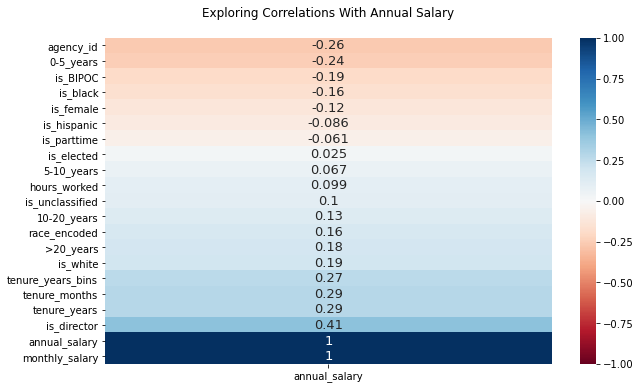

In [17]:
## Creating a heatmap showing correlations to our target variable

plt.figure(figsize = (10,6))  
sns.heatmap(train.corr()[['annual_salary']].sort_values(by='annual_salary', 
                                                        ascending = True), cmap = 'RdBu', 
            vmax = 1, vmin = -1, center = 0, 
            annot = True, annot_kws={"size": 13} )
plt.title('Exploring Correlations With Annual Salary\n')
plt.show()

#### Pearson-R Correlation Testing
- Top 6 Correlated Features
    - agency_id
    - 0-5 years
    - tenure_months
    - tenure_years_bins
    - tenure_years
    - is_director
    

In [18]:
alpha = 0.05 ## <-- Determining alpha value

Standard Hypothesis for correlation test of all variables

$H_0$ : There is no relationship between these variables

$H_a$ : There is evidence to suggest there is a realtionhip between these two variables

##### Agency ID vs. Annual Salary

In [19]:
## performing correlation test on agency_id because the heat map showed
## a good correlation value.

## Now we test it to determine if it is a significant relationship

corr, p = stats.pearsonr(train.agency_id, train.annual_salary)
corr, p

(-0.260989684266699, 0.0)

With a correlation of -0.26 and a p value less than our alpha 0.05 we can conclude that there is evidence to suggest there is a significant correlation between the agency id and the annual salary of a Texas government employee.

##### 0-5 Years Tenure vs. Annual Salary

In [20]:
## performing correlation test on 0-5 years because the heat map showed
## a good correlation value.

## Now we test it to determine if it is a significant relationship

corr, p = stats.pearsonr(train['0-5_years'], train.annual_salary)
corr, p

(-0.24415913095521297, 0.0)

With a correlation of -0.24 and a p value near 0 we can conclude that there is evidence to suggest there is a significant correlation between the employees that have 0 to 5 years of tenure and their annual salaries.

##### Months of Tenure vs. Annual Salary

In [21]:
## performing correlation test on tenure in months because the heat map showed
## a good correlation value.

## Now we test it to determine if it is a significant relationship

corr, p = stats.pearsonr(train['tenure_months'], train.annual_salary)
corr, p

(0.28509496814591595, 0.0)

With a correlation of 0.28 and a p value near 0 we can conclude that there is evidence to suggest there is a significant correlation between the employees tenure in months and their annual salaries.

##### Years of Tenure vs. Annual Salary

In [22]:
## performing correlation test on tenure in years because the heat map showed
## a good correlation value.

## Now we test it to determine if it is a significant relationship

corr, p = stats.pearsonr(train['tenure_years'], train.annual_salary)
corr, p

(0.2851556967713695, 0.0)

With a correlation of 0.28 and a p value near 0 we can conclude that there is evidence to suggest there is a significant correlation between the employees tenure in years and their annual salaries

##### Years of Tenure Bins vs. Annual Salary

In [23]:
## performing correlation test on the tenure years bins because the heat map showed
## a good correlation value.

## Now we test it to determine if it is a significant relationship

corr, p = stats.pearsonr(train['tenure_years_bins'], train.annual_salary)
corr, p

(0.26952636562585924, 0.0)

With a correlation of 0.27 and a p value near 0 we can conclude that there is evidence to suggest there is a significant correlation between grouping employees into different tenure brackets (0-5 years, 5-10 years, 10-20 years, and more than 20 years) and their annual salary.

#####  Director Cat

In [48]:
## performing correlation test on the is_director one hot encoded column because the heat 
## map showed a good correlation value.

## Now we test it to determine if it is a significant relationship

corr, p = stats.pearsonr(train['is_director'], train.annual_salary)
corr, p

(0.4123192811532364, 0.0)

With a correlation of 0.41 and a p value of 0 we can conclude that there is evidence to suggest there is a significant correlation between the employees that categorized by the director title and their annual salaries.

#### Pearson-R Correlation Testing: Takeaways

Features Tested with annual_salary
   * agency_id:               corr = -0.26
   * 0-5 years:               corr = -0.24
   * tenure_months:           corr = 0.29
   * tenure_years_bins:       corr = 0.27
   * tenure_years:            corr = 0.29
   * is_director:             corr = 0.41

After running Person-R correlation test's on these top correlated features all of the test results returned p-value's near zero. Therefore we can conclude there is a signifcant correlation between these variables and look into using them in our models to improve model performance.

### Exploring Different Relationships With Race

#### Boxplots

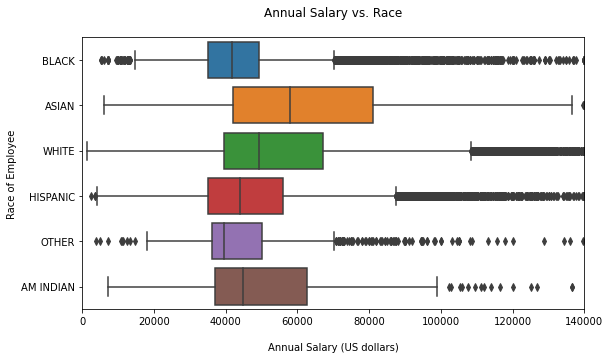

In [24]:
plt.figure(figsize = (9,5))
sns.boxplot(data = train, x='annual_salary', y='race')
plt.xlim(0,140000)
plt.xlabel('\nAnnual Salary (US dollars)')
plt.ylabel('Race of Employee')
plt.title('Annual Salary vs. Race\n')
plt.show()

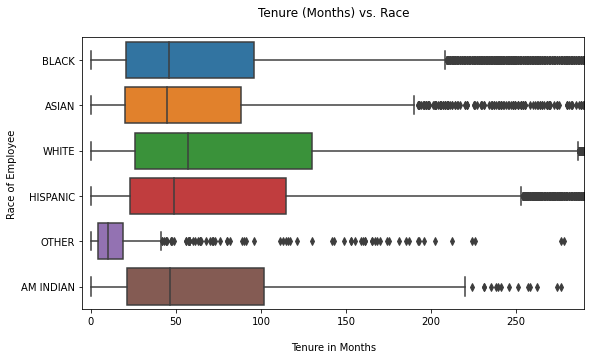

In [25]:
## plotting the tenure in months with an x limit to focus more on the IQRs and 
## Median values of each race's tenure

plt.figure(figsize = (9,5))
sns.boxplot(data = train, x='tenure_months', y='race')
plt.xlim(-5,290)
plt.xlabel('\nTenure in Months')
plt.ylabel('Race of Employee')
plt.title('Tenure (Months) vs. Race\n')
plt.show()

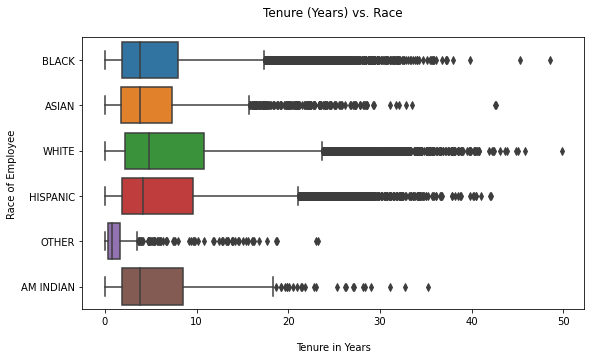

In [26]:
## plotting the years without an x limit to view outliers of different race's tenure
## in years

plt.figure(figsize = (9,5))
sns.boxplot(data = train, x='tenure_years', y='race')
plt.xlabel('\nTenure in Years')
plt.ylabel('Race of Employee')
plt.title('Tenure (Years) vs. Race\n')
plt.show()

#### Two-Tailed T Tests
 - Testing for Significant difference in average annual salaries vs. race

In [27]:
alpha = 0.05 ## <-- Determining alpha value

##### BIPOC vs. White: Annual Salary

$H_0$: Texas Government employees and whether or not they fall in the BIPOC category is idependent of their annual salary

$H_a$: Texas Government employees and whether or not they fall in the BIPOC have a significant difference in their annual salaries

In [28]:
## making our two sub group dataframes: bipoc and non-bipoc

bipoc = train[train['is_BIPOC'] == 1]
non_bipoc = train[train['is_BIPOC'] == 0]

In [29]:
## running our stats test 

t, p = stats.ttest_ind(bipoc.annual_salary, non_bipoc.annual_salary)
t, p

(-55.06420480879216, 0.0)

With a p-value of zero we can conclude there is a significant difference in annual salary between BIPOC and white texas government employees.

##### Black vs. White: Annual Salary

$H_0$: Texas Government employees and if they are black or white is independent of their annual salary

$H_a$: Texas Government employees and if they are black or white have a significant difference in their annaul salaries

In [30]:
## making our two sub group dataframes: white and black

white = train[train['is_white'] == 1]
black = train[train['is_black'] == 1]

In [31]:
## running our stats test 

t, p = stats.ttest_ind(white.annual_salary, black.annual_salary)
t, p

(55.996218415976465, 0.0)

With a p-value of zero we can conclude there is a significant difference in annual salary between black and white texas government employees.

##### Asian vs. White

$H_0$: Texas Government employees and if they are asian or white is independent of their annual salary

$H_a$: Texas Government employees and if they are asian or white have a significant difference in their annaul salaries

In [32]:
## making our asian subgroup since we made a white subgroup for the t-test above

asian  = train[train['race'] == 'ASIAN']

In [33]:
## running our stats test 

t, p = stats.ttest_ind(asian.annual_salary, white.annual_salary)
t, p

(12.535643782805728, 5.59880377398969e-36)

With a p-value near zero we can conclude there is a significant difference in annual salary between asian and white texas government employees.

##### Hispanic vs. White: Annual Salary

$H_0$: Texas Government employees and if they are hispanic or white is independent of their annual salary

$H_a$: Texas Government employees and if they are hispanic or white have a significant difference in their annaul salaries

In [34]:
## making our hispanic subgroup since we made a white subgroup for the t-test above

hispanic = train[train['race'] == 'HISPANIC']

In [35]:
## running our stats test 

t, p = stats.ttest_ind(hispanic.annual_salary, white.annual_salary)
t, p

(-39.650997407439704, 0.0)

With a p-value of zero we can conclude there is a significant difference in annual salary between hispanic and white texas government employees.

#### Two-Tailed T Test Takeaways:

Annual Salaries Compared:
 - BIPOC vs. White
 - Black vs. White
 - Asian vs. White
 - Hispanic vs. White
 
With running two-tailed t test's on different racial subgroups of texas government employees' average annual salaries. We can conclude there are statistical differences in the the salaries between each race because the p-value returned from all of the statistical testing was either zero or near zero.


#### One-Tailed T Tests
- Testing for significant difference in racial subgroups versus the entire population

In [36]:
alpha = 0.05 ## <-- Determining alpha value

##### Other vs. Population: Annual Salary

$H_0$: Texas Government employees and if they fall in the other race category has no signifcant difference in salary versus the population

$H_a$: Texas Government employees and if they fall in the other race category have a significant difference in their salaries versus the population

In [37]:
## making our subgroup for other

other = train[train.race == 'OTHER']

In [38]:
## running our stats test 

t, p = stats.ttest_ind(other.annual_salary, train.annual_salary)
t, p/2 ## <-- returning p / 2 because it is a one tailed t test

(-7.724364870703877, 5.6840648510102565e-15)

With a p-value near zero we can conclude there is a significant difference in annual salary between the other race employee versus the population of employees.

##### Black vs. Population: Annual Salary

$H_0$: Texas Government employees that are black have no significant difference in salary versus the population

$H_a$: Texas Government employees that are black have a significant difference in salary versus the population

In [39]:
## running our stats test  

t, p = stats.ttest_ind(black.annual_salary, train.annual_salary)
t, p/2 ## <-- returning p / 2 because it is a one tailed t test

(-38.63900965914874, 0.0)

With a p-value of zero we can conclude there is a significant difference in annual salary between the black employee versus the population of employees.

##### Asian vs Population: Annual Salary

$H_0$: Texas Government employees that are asian have no significant difference in salary versus the population

$H_a$: Texas Government employees that are asian have a significant difference in salary versus the population

In [40]:
## running our stats test  

t, p = stats.ttest_ind(asian.annual_salary, train.annual_salary)
t, p/2 ## <-- returning p / 2 because it is a one tailed t test

(24.995121530242066, 1.1082300118690345e-137)

With a p-value near zero we can conclude there is a significant difference in annual salary between the asian employee versus the population of employees.

#### One-Tailed T Test Takeaways:

Annual Salaries Compared:
 - Other vs. Population
 - Black vs. Population
 - Asian vs. Population
 
With running one-tailed t test's on different racial subgroups against the total population of texas government employees annual salaries. We can conclude there are statistical differences in the the salaries between each race and the population because the p-value returned from all of the statistical testing was either zero or near zero.


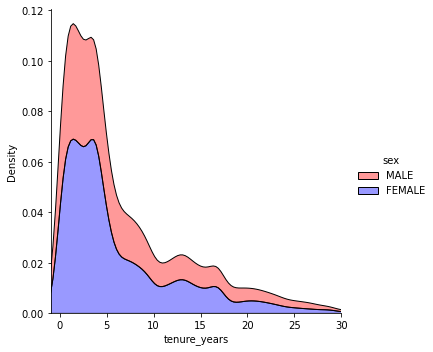

In [41]:
# histogram with hue and stacking
sns.displot(data = train, x = 'tenure_years', hue = 'sex', multiple = 'stack',
            palette = ['r', 'b'], alpha = 0.4, kind = 'kde')
plt.xlim(-1,30) ## <-- using x-limit to look more towards the IQRs and not the outliers
plt.show()

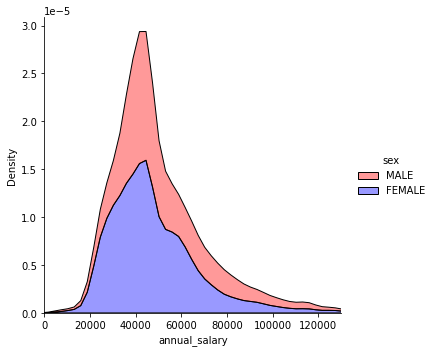

In [42]:
# histogram with hue and stacking
sns.displot(data = train, x = 'annual_salary', hue = 'sex', multiple = 'stack',
            palette = ['r', 'b'], alpha = 0.4, kind = 'kde')
plt.xlim(0,130000) ## <-- using x-limit to look more towards the IQRs and not the outliers
plt.show()

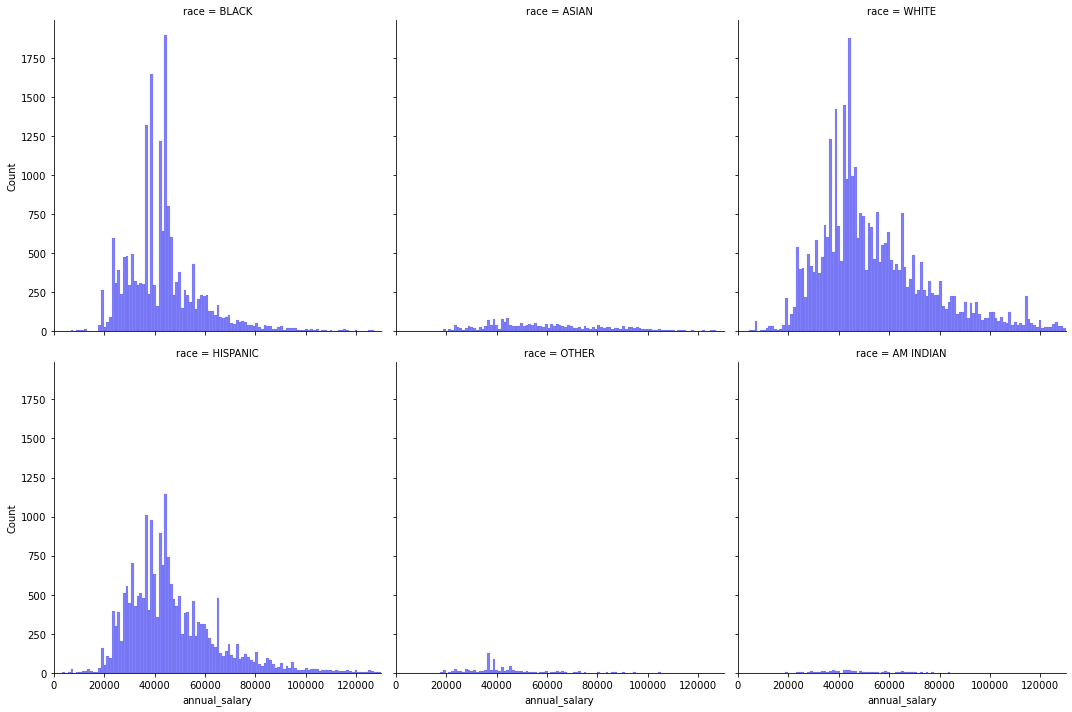

In [46]:
sns.displot(data = train, x = 'annual_salary', col = 'race', color = 'blue', 
            alpha = 0.5, col_wrap = 3)
plt.xlim(0,130000)
plt.show()

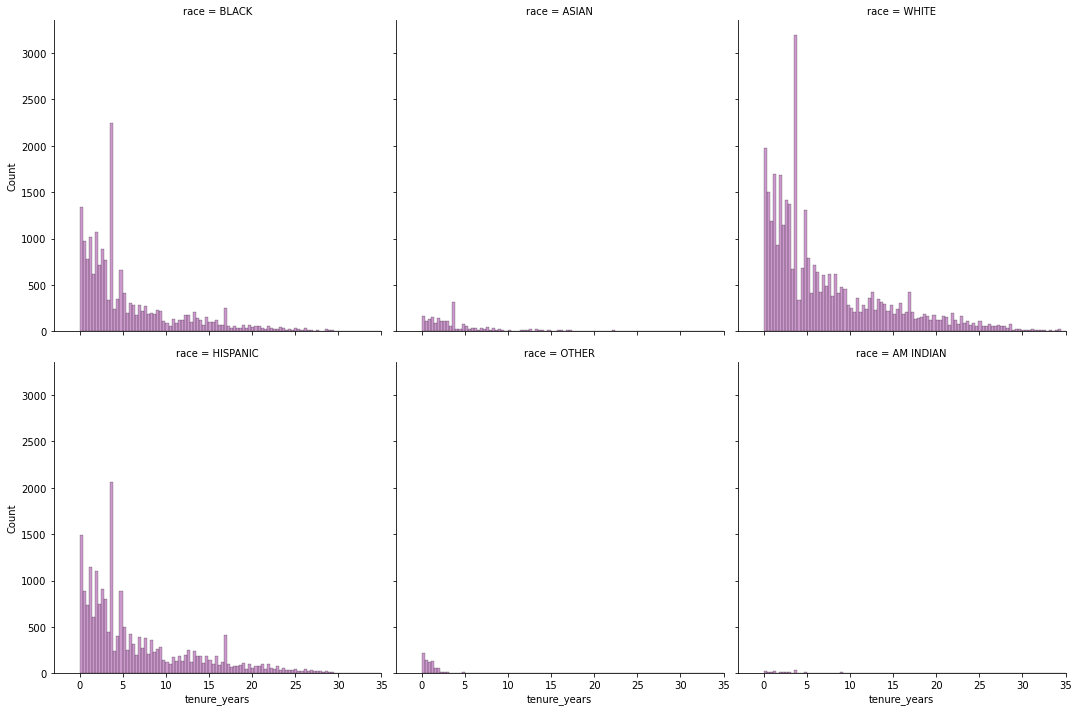

In [47]:
sns.displot(data = train, x = 'tenure_years', col = 'race', color = 'purple', 
            alpha = 0.4, col_wrap = 3)
plt.xlim(-3,35)
plt.show()